<a href="https://colab.research.google.com/github/YutongWu12/FRE-GY5040-Machine-Learning-for-Finance-with-Python/blob/main/2_Linear_Regression_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression - Introduction

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- This essentially means that the effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

**Note that I would provide the best student solution for every question as the final solution.**

## Imports & Settings

Have a look out for the <font color='orange'>orange text </font> it indicates questions that has to be answered or code that has to be writte. The number of points for each question will appear next to it, like <font color='orange'>Question 1 (4 points) </font>. In total we have <font color='orange'>**16 points** </font>.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Generate random data

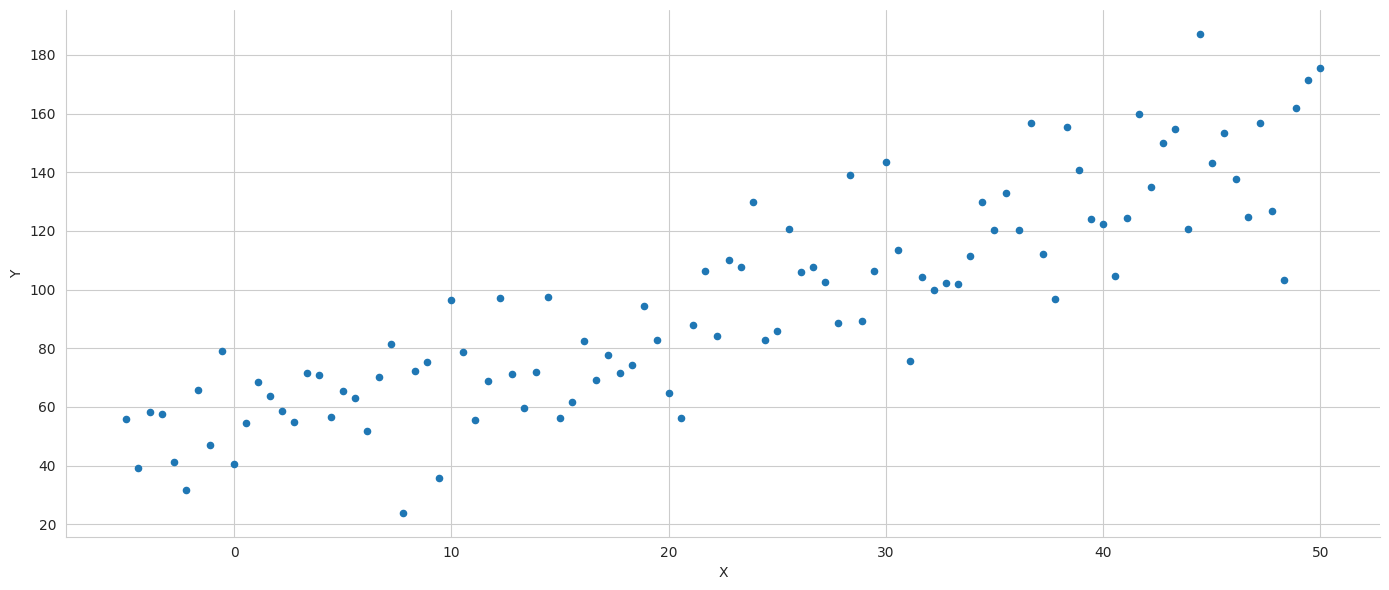

In [ ]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

<font color='orange'>Question 1: Get stock price data (4 points) </font>

Have a look at the format of the random dataframe above called *data* above, you can see what it looks like by running `data.head()`  

*   We want to create a new Pandas dataframe and have the S&P index **returns** in the X column, and Tesla **returns** in the y column; you can give the columns appropriate names.
*   The data should start on the 7th of January 2020 and stop on the 21st of January 2022.
*   The returns should be calculated on the adjusted closing price of the security.
*   The date should be set as the index so that it doesn't appear as a feature, you can use any daily date format.


### Some advice
You could use multiple open source python packages like googlefinance or yfinance. There are many places where you can learn how to use the package, I can recomend Stefan Jansen's [resource](https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/02_market_and_fundamental_data/03_data_providers/02_yfinance_demo.ipynb). Notice that this data might not be as accurate as those from paid providers.

*Note the technique I showed below might not be the easiest solution, and you need to do some additional work to get the returns out of the package.*


```python
import yfinance as yf
symbol = 'FB'
ticker = yf.Ticker(symbol)
```

You have to learn how to download Python packages, a popular method is to use `!pip install yfinance` for example

Perhaps you can even do it without a package if you know how to query and API, you can query the yahoo data directly:



```python
# yahoo url template (5 years of daily data: 2015-09-21 to 2020-09-18)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1442707200&period2=1600560000&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['AAPL', 'MSFT', '^GSPC']

df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(ticker)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df
```






In [ ]:
#### Your solution for 4 points goes into this code block (there are thousands of ways to get the data you can use any method to get to the final solution):
import yfinance as yf
import pandas as pd

symbols = ['^GSPC', 'TSLA']

data = yf.download(symbols, start='2020-01-07', end='2022-01-21')

data = data['Adj Close']
data.columns = ['SP500', 'Tesla']

returns = data.pct_change().dropna()

returns.index = pd.to_datetime(returns.index)

print(returns.head())



[*********************100%%**********************]  2 of 2 completed

            SP500  Tesla
Date                    
2020-01-08   0.05   0.00
2020-01-09  -0.02   0.01
2020-01-10  -0.01  -0.00
2020-01-13   0.10   0.01
2020-01-14   0.02  -0.00


#### Estimate a simple regression with statsmodels

The upper part of the summary displays the dataset characteristics, namely the estimation method, the number of observations and parameters, and indicates that standard error estimates do not account for heteroskedasticity.

The middle panel shows the coefficient values that closely reflect the artificial data generating process. We can confirm that the estimates displayed in the middle of the summary result can be obtained using the OLS formula derived previously:

In [ ]:
## Here you can choose to assess the random dataframe, or the new return dataframe that you just created
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     309.1
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           4.57e-32
Time:                        19:33:12   Log-Likelihood:                -430.19
No. Observations:                 100   AIC:                             864.4
Df Residuals:                      98   BIC:                             869.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9972      3.110     16.400      0.0

#### Verify calculation

In [ ]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
pd.Series(beta, index=X.columns)

,0
const,51.00
X,1.98


#### Display model & residuals

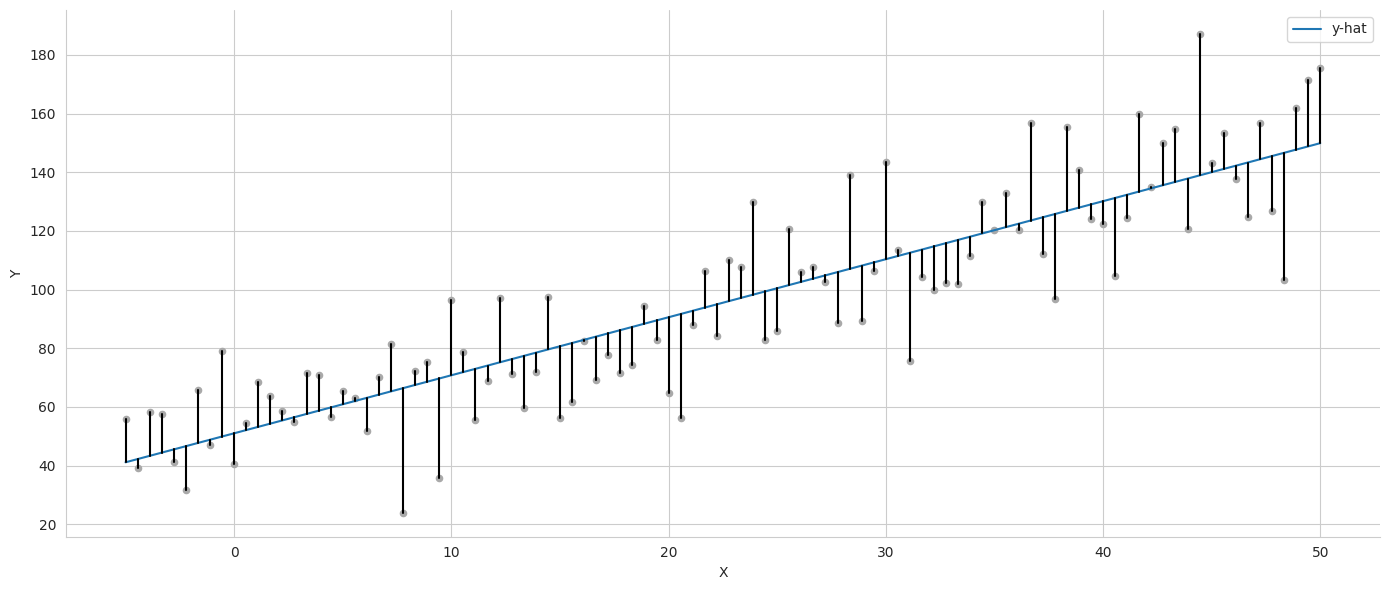

In [ ]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')
sns.despine()
plt.tight_layout();

<font color='orange'>Question 2: There is a common metric in statistics called mean squared error (MSE), define it and calculate it for the predictions above (4 points) </font>



*   You can either use the prediction using returns data or the predictions of the random data, i.e., you decide what predictions to use.
*   I only care about your definition and the methodology you use.



In [ ]:
## Write (code) your answers here to obtain all 4 points
mse = np.mean(data['residuals'] ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 319.22540882069256


### Multiple Regression


For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

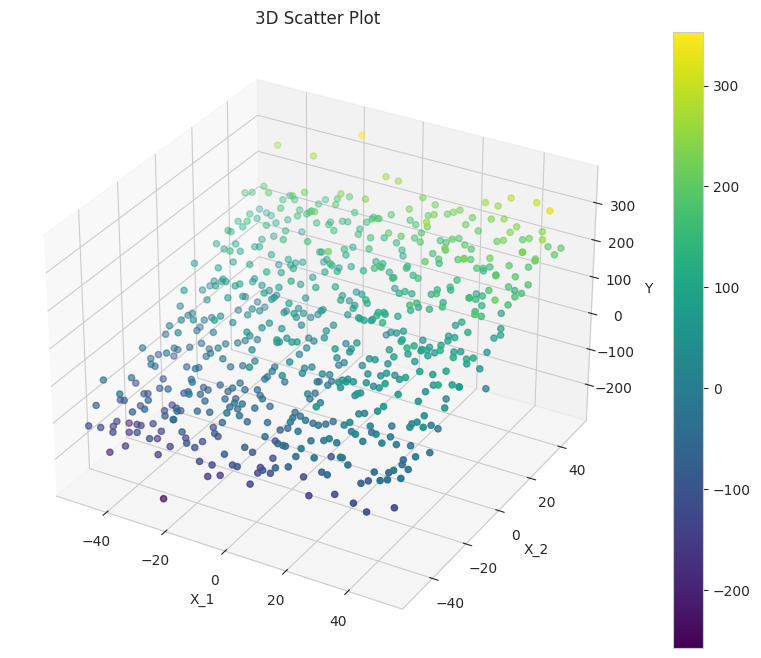

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(data.X_1, data.X_2, data.Y, c=data.Y, cmap='viridis')

# Set labels
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')

# Add a color bar
plt.colorbar(scatter)

# Set title
plt.title('3D Scatter Plot')

# Show the plot
plt.show()

In [ ]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodels

The upper right part of the panel displays the goodness-of-fit measures just discussed, alongside the F-test that rejects the hypothesis that all coefficients are zero and irrelevant. Similarly, the t-statistics indicate that intercept and both slope coefficients are, unsurprisingly, highly significant.

The bottom part of the summary contains the residual diagnostics. The left panel displays skew and kurtosis that are used to test the normality hypothesis. Both the Omnibus and the Jarque—Bera test fails to reject the null hypothesis that the residuals are normally distributed. The Durbin—Watson statistic tests for serial correlation in the residuals and has a value near 2 which, given 2 parameters and 625 observations, fails to reject the hypothesis of no serial correlation.

Lastly, the condition number provides evidence about multicollinearity: it is the ratio of the square roots of the largest and the smallest eigenvalue of the design matrix that contains the input data. A value above 30 suggests that the regression may have significant multicollinearity.

In [ ]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     1039.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          5.17e-199
Time:                        18:20:10   Log-Likelihood:                -3335.4
No. Observations:                 625   AIC:                             6677.
Df Residuals:                     622   BIC:                             6690.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.0996      2.016     24.353      0.0

#### Verify computation

In [ ]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   48.57
X_1      1.11
X_2      2.96
dtype: float64

#### Save output as image

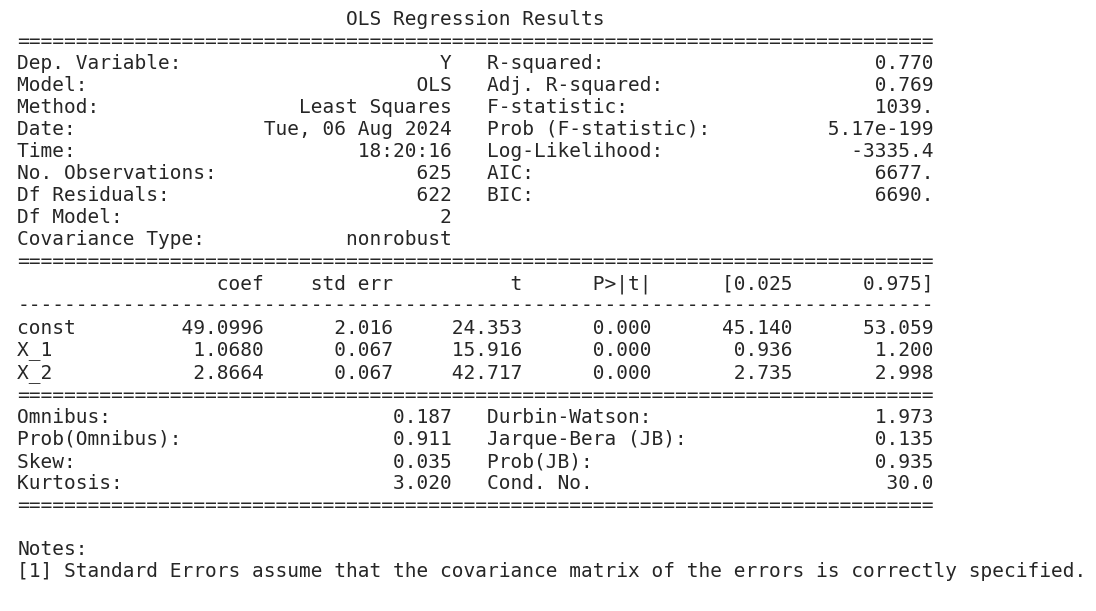

In [ ]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### Display model & residuals

The following diagram illustrates the hyperplane fitted by the model to the randomly generated data points

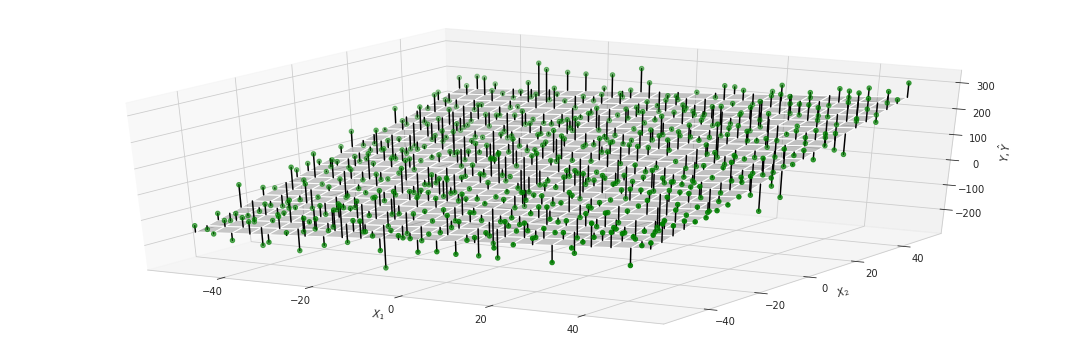

In [ ]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

Additional [diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

## Stochastic Gradient Descent Regression

The sklearn library includes an SGDRegressor model in its linear_models module. To learn the parameters for the same model using this method, we need to first standardize the data because the gradient is sensitive to the scale.

### Prepare data

The gradient is sensitive to scale and so is SGDRegressor. Use the `StandardScaler` or `scale` to adjust the features.

We use StandardScaler() for this purpose that computes the mean and the standard deviation for each input variable during the fit step, and then subtracts the mean and divides by the standard deviation during the transform step that we can conveniently conduct in a single fit_transform() command:

In [ ]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

### Configure SGDRegressor

Then we instantiate the SGDRegressor using the default values except for a random_state setting to facilitate replication:

In [ ]:
sgd = SGDRegressor(loss='squared_error',
                   fit_intercept=True,
                   shuffle=True,
                   random_state=42,
                   learning_rate='invscaling',
                   eta0=0.01,
                   power_t=0.25)

### Fit Model

Now we can fit the sgd model, create the in-sample predictions for both the OLS and the sgd models, and compute the root mean squared error for each:

In [ ]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(random_state=42)

As expected, both models yield the same result. We will now take on a more ambitious project using linear regression to estimate a multi-factor asset pricing model.

In [ ]:
coeffs = (sgd.coef_ * scaler.scale_) + scaler.mean_
pd.Series(coeffs, index=X.columns)

X_1     969.56
X_2   2,594.83
dtype: float64

In [ ]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [ ]:
resids.pow(2).sum().div(len(y)).pow(.5)

sgd   50.28
ols   50.28
dtype: float64

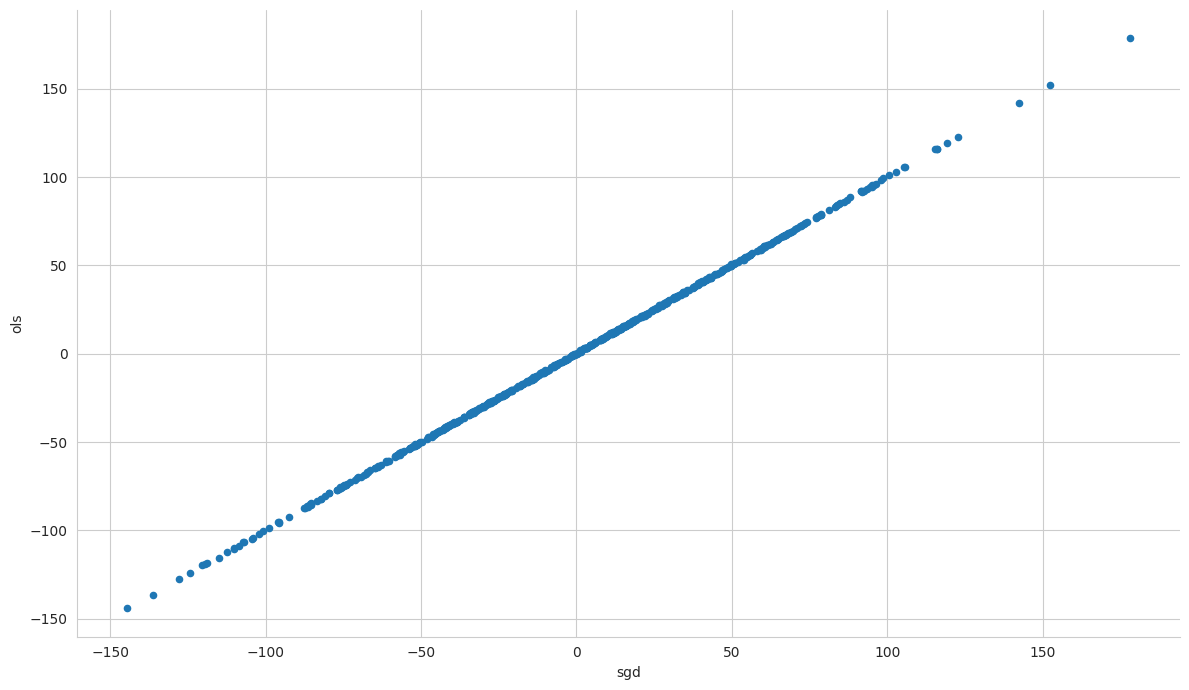

In [ ]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();

## How to build a linear factor model

Algorithmic trading strategies use linear factor models to quantify the relationship between the return of an asset and the sources of risk that represent the main drivers of these returns. Each factor risk carries a premium, and the total asset return can be expected to correspond to a weighted average of these risk premia.

There are several practical applications of factor models across the portfolio management process from construction and asset selection to risk management and performance evaluation. The importance of factor models continues to grow as common risk factors are now *tradeable*:

- A summary of the returns of many assets by a much smaller number of factors reduces the amount of data required to estimate the covariance matrix when optimizing a portfolio
- An estimate of the exposure of an asset or a portfolio to these factors allows for the management of the resultant risk, for instance by entering suitable hedges when risk factors are themselves traded
- A factor model also permits the assessment of the incremental signal content of new alpha factors
- A factor model can also help assess whether a manager's performance relative to a benchmark is indeed due to skill in selecting assets and timing the market, or if instead, the performance can be explained by portfolio tilts towards known return drivers that can today be replicated as low-cost, passively managed funds without incurring active management fees

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
!pip install linearmodels

Linear (regression) models for Python. Extends statsmodels with Panel regression, instrumental variable estimators, system estimators and models for estimating asset prices:

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

## Get Data

Fama and French make updated risk factor and research portfolio data available through their [website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html), and you can use the `pandas_datareader` package to obtain the data.

### Risk Factors

In particular, we will be using the five Fama—French factors that result from sorting stocks first into three size groups and then into two for each of the remaining three firm-specific factors.

Hence, the factors involve three sets of value-weighted portfolios formed as 3 x 2 sorts on size and book-to-market, size and operating profitability, and size and investment. The risk factor values computed as the average returns of the portfolios (PF) as outlined in the following table:

| Label | Name                          | Description                                                                                                                                                                               |
|-------|-------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| SMB   | Small Minus Big               | Average return on the nine small stock portfolios minus the average return on the nine big stock portfolios                                                                               |
| HML   | High Minus Low                | Average return on the two value portfolios minus the average return on the two growth portfolios                                                                                          |
| RMW   | Robust minus Weak             | Average return on the two robust operating profitability portfolios minus the average return on the two weak operating profitability portfolios                                           |
| CMA   | Conservative Minus Aggressive | Average return on the two conservative investment portfolios minus the average return on the two aggressive investment portfolios                                                         |
| Rm-Rf | Excess return on the market   | Value-weight return of all firms incorporated in the US and listed on the NYSE, AMEX, or NASDAQ at the beginning of month t with 'good' data for t minus the one-month Treasury bill rate |

The Fama-French 5 factors are based on the 6 value-weight portfolios formed on size and book-to-market, the 6 value-weight portfolios formed on size and operating profitability, and the 6 value-weight portfolios formed on size and investment. We will look more into these factors in future lectures, so don't worry too much if you don't understand it yet.

We will use returns at a monthly frequency that we obtain for the period 2010 – 2017 as follows:

In [ ]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010-1-1', end='2017-12-31')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [ ]:
ff_factor_data.describe()

,Mkt-RF,SMB,HML,RMW,CMA,RF
count,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.16,0.06,-0.05,0.13,0.05,0.01
std,3.58,2.30,2.20,1.58,1.41,0.02
min,-7.89,-4.55,-4.70,-3.88,-3.27,0.00
25%,-0.92,-1.70,-1.66,-1.09,-0.95,0.00
50%,1.23,0.21,-0.31,0.20,-0.01,0.00
75%,3.20,1.59,1.21,1.20,0.92,0.01
max,11.35,7.07,8.21,3.48,3.70,0.09


### Portfolios

Fama and French also make available numerous portfolios that we can illustrate the estimation of the factor exposures, as well as the value of the risk premia available in the market for a given time period. We will use a panel of the 17 industry portfolios at a monthly frequency.

We will subtract the risk-free rate from the returns because the factor model works with excess returns:

In [ ]:
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010-1-1', end='2017-12-31')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [ ]:
ff_portfolio_data.describe()

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
count,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00,96.00
mean,1.04,0.21,0.59,1.38,1.14,1.33,1.19,1.73,0.54,1.35,1.22,1.28,1.47,0.89,1.24,1.25,1.29
std,2.81,7.94,5.50,5.01,5.21,5.59,3.14,5.25,7.42,4.71,4.80,5.76,4.17,3.23,3.52,4.87,3.67
min,-5.16,-24.51,-11.76,-9.77,-13.17,-16.77,-7.18,-14.14,-20.57,-12.18,-9.11,-11.77,-8.66,-7.11,-9.20,-11.29,-8.04
25%,-0.80,-5.81,-3.17,-1.57,-2.27,-1.34,-0.90,-2.44,-4.38,-1.45,-2.01,-1.25,-0.86,-0.73,-0.95,-1.53,-1.15
50%,0.94,-0.48,0.99,1.15,1.23,1.44,1.47,2.16,0.66,1.50,1.49,0.62,1.52,1.27,0.89,1.79,1.57
75%,3.21,5.90,4.20,3.77,4.63,4.44,3.29,5.55,4.27,3.85,4.58,4.81,4.34,2.93,3.37,4.15,3.42
max,6.68,22.03,16.03,17.32,16.58,18.36,8.28,15.58,21.62,17.87,14.74,21.04,13.03,7.84,12.46,13.50,10.43


### Equity Data

<font color='orange'>Question 3: You are going to work with large files in financial machine learning applications, as such you should show that you can extract compressed files (4 points) </font>

link: `https://storage.googleapis.com/public-quant/course//content/quandl-wiki-prices-us-equites.zip` (**changed**)

*   Once more you can use any method and library that you please, i will simply provide you with the compressed link.
*   The final csv file that you extract has to be renamed as ``wiki_prices.csv`` then you can succesfully run the code below.
*   Note we don't know all the solutions, so stackoverflow and google are your friends, use them!
*   Hint, you might want to learn how to `!wget` to download the file directly to the notebook, and how to use `!mv` to rename the file.
*   We use the `!` command when we want to speak directly to the terminal.





In [ ]:
## Provide your solution here (first perform the wget command)
!wget https://storage.googleapis.com/public-quant/course//content/quandl-wiki-prices-us-equites.zip


--2024-08-19 19:38:56--  https://storage.googleapis.com/public-quant/course//content/quandl-wiki-prices-us-equites.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463184323 (442M) [application/zip]
Saving to: ‘quandl-wiki-prices-us-equites.zip’

quandl-wiki-prices- 100%[===================>] 441.73M  30.9MB/s    in 13s     

2024-08-19 19:39:10 (33.2 MB/s) - ‘quandl-wiki-prices-us-equites.zip’ saved [463184323/463184323]



In [ ]:
## Provide your solution here (then unzip the file)
!unzip quandl-wiki-prices-us-equites.zip



Archive:  quandl-wiki-prices-us-equites.zip
  inflating: WIKI_PRICES.csv         


In [ ]:
!mv WIKI_PRICES.csv wiki_prices.csv

In [ ]:
quandl_archive = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True).sort_index())
prices = quandl_archive.adj_close.unstack().loc['2010':'2017']

In [ ]:
equities = pd.read_csv('https://raw.githubusercontent.com/stefan-jansen/machine-learning-for-trading/f881ea01ef8ae5a308ab75de833ba24bee27435e/data/us_equities_meta_data.csv')
equities = equities.set_index('ticker').drop_duplicates()

In [ ]:
sectors = equities.filter(prices.columns, axis=0).sector.to_dict()
prices = prices.filter(sectors.keys()).dropna(how='all', axis=1)

In [ ]:
returns = prices.resample('M').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns.info()

### Question 4

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Generate 500 days of returns
n_days = 500

# S&P 500 returns (normally distributed with mean 0.0005 and std 0.01)
sp500_returns = np.random.normal(0.0005, 0.01, n_days)

# Generate correlated stock returns
beta = 1.2
alpha = 0.0001
epsilon = np.random.normal(0, 0.02, n_days)
stock_returns = alpha + beta * sp500_returns + epsilon

# Create a DataFrame
df = pd.DataFrame({
    'Date': pd.date_range(start='2022-01-01', periods=n_days),
    'SP500_Return': sp500_returns,
    'Stock_Return': stock_returns
})

<font color='orange'>Question 4: Calculate the rolling correlation between the stock returns and the S&P 500 returns with a 14 day lookback period and plot the stock price. Also calculate the rolling volatility of the stock. Plot both on the same plot
(4 points)</font>

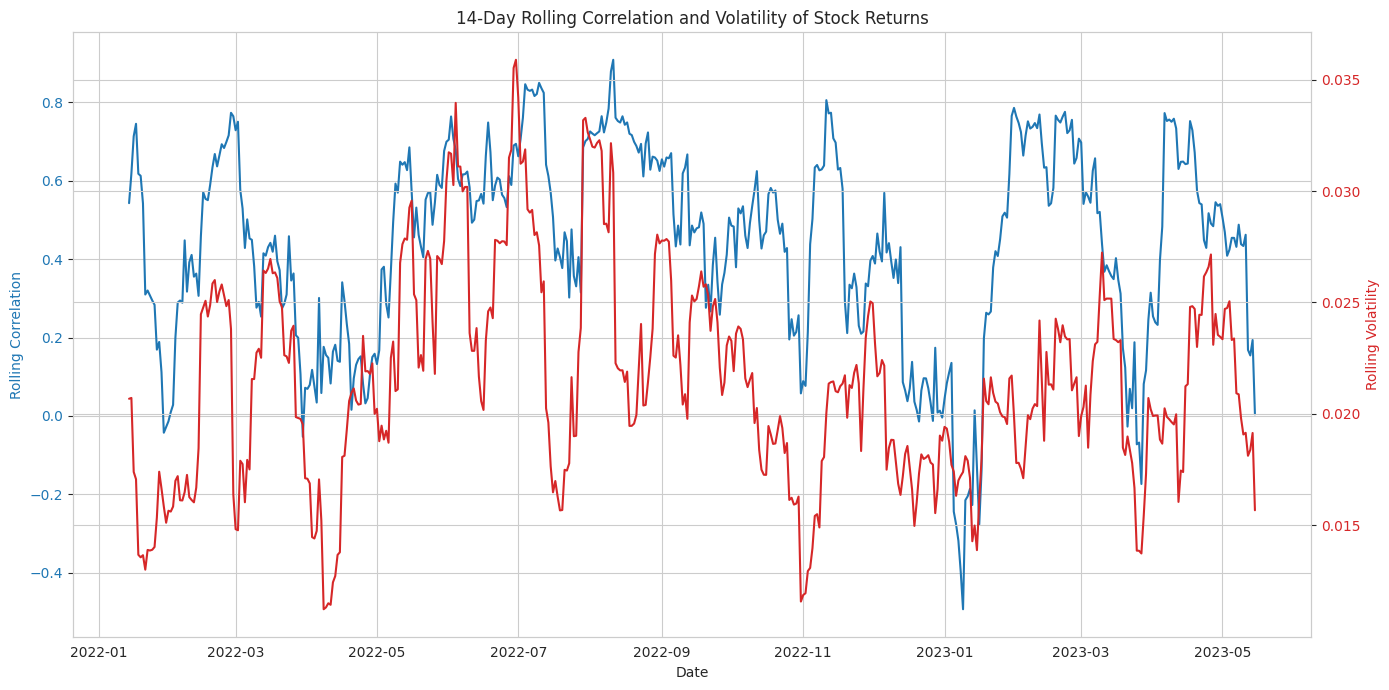

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算14天的滚动相关性
df['Rolling_Correlation'] = df['Stock_Return'].rolling(window=14).corr(df['SP500_Return'])

# 计算14天的滚动波动率
df['Rolling_Volatility'] = df['Stock_Return'].rolling(window=14).std()

# 绘制图形
fig, ax1 = plt.subplots(figsize=(14, 7))

# 绘制滚动相关性
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Correlation', color='tab:blue')
ax1.plot(df['Date'], df['Rolling_Correlation'], color='tab:blue', label='Rolling Correlation')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 创建第二个y轴
ax2 = ax1.twinx()
ax2.set_ylabel('Rolling Volatility', color='tab:red')
ax2.plot(df['Date'], df['Rolling_Volatility'], color='tab:red', label='Rolling Volatility')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 添加标题
plt.title('14-Day Rolling Correlation and Volatility of Stock Returns')

# 显示图例
fig.tight_layout()
plt.show()
